In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import math
from functions import split_dataset_LSTM, train_model_LSTM_hyperparams
%matplotlib inline

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/DImiTrisXam/algo_project1/main/project3/datasets/nasdaq2007_17.csv", header=None, sep='\t')
print("Number of rows and columns:", df.shape)
# df.head(5)

time_array = np.array([x for x in range(len(df.columns))])
df2 = pd.DataFrame(time_array)

N = 5  # number of time series from dataset
training_percent = 0.8
look_back = 60
sc = MinMaxScaler(feature_range=(0, 1))

Number of rows and columns: (359, 3651)


In [16]:
# load model trained with whole dataset
model_N = keras.models.load_model("./models/forecast_model")

Epoch 1/10
23/23 [==============================] - 22s 392ms/step - loss: 2.4914
Epoch 2/10
23/23 [==============================] - 9s 393ms/step - loss: 0.0111
Epoch 3/10
23/23 [==============================] - 9s 395ms/step - loss: 0.0037
Epoch 4/10
23/23 [==============================] - 9s 397ms/step - loss: 0.0034
Epoch 5/10
23/23 [==============================] - 9s 397ms/step - loss: 0.0032
Epoch 6/10
23/23 [==============================] - 9s 395ms/step - loss: 0.0030
Epoch 7/10
23/23 [==============================] - 9s 396ms/step - loss: 0.0027
Epoch 8/10
23/23 [==============================] - 9s 395ms/step - loss: 0.0024
Epoch 9/10
23/23 [==============================] - 9s 396ms/step - loss: 0.0024
Epoch 10/10
23/23 [==============================] - 9s 394ms/step - loss: 0.0023
Epoch 1/10
23/23 [==============================] - 18s 394ms/step - loss: 1.0821
Epoch 2/10
23/23 [==============================] - 9s 395ms/step - loss: 0.0077
Epoch 3/10
23/23 [=======

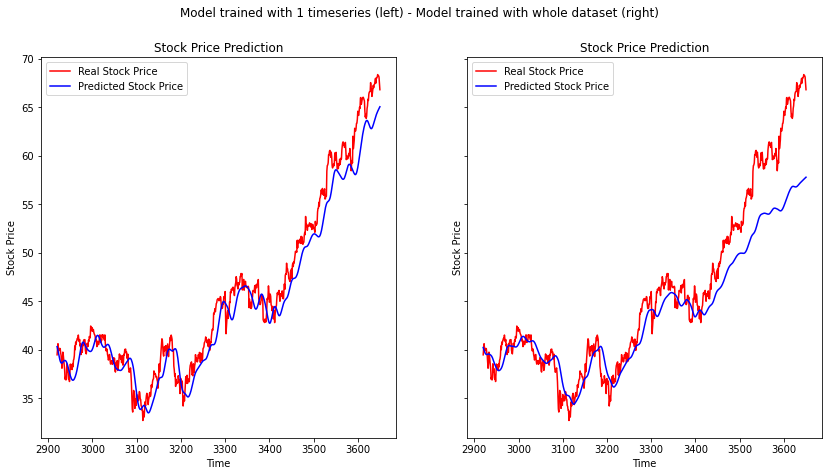

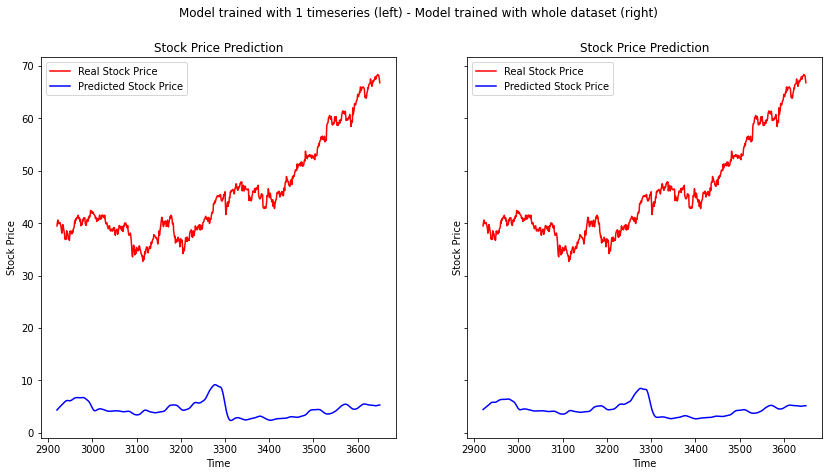

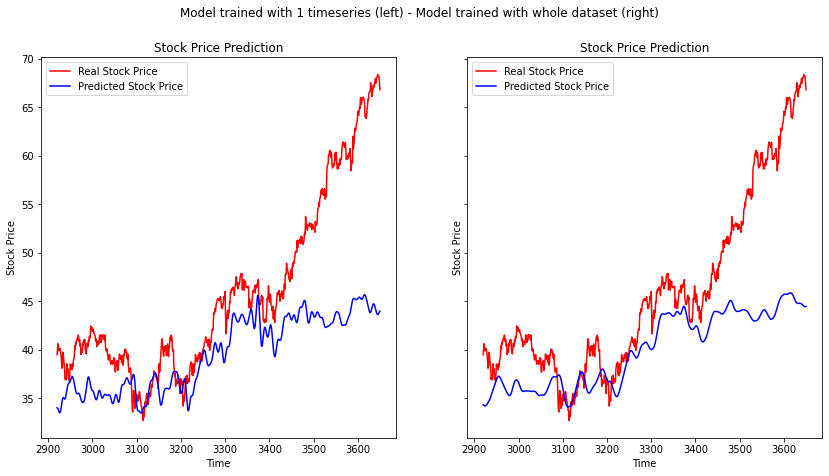

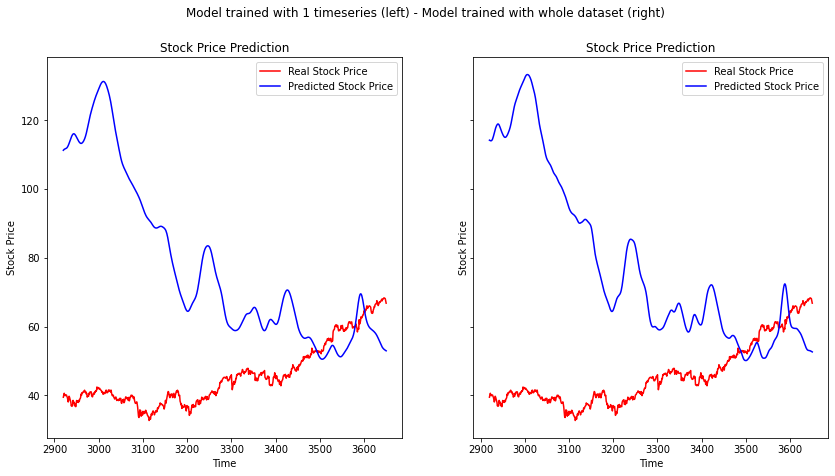

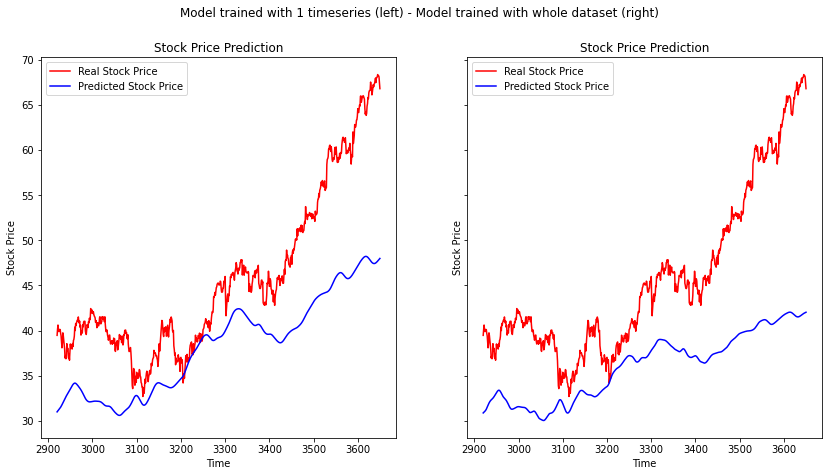

In [17]:
# pick some examples of stocks
stocks = [0, 10, 21, 99, 350]

# compare results of the two models for each example
for i in stocks:
    # Creating a data structure with 'look_back' time-steps and 1 output
    X_train, y_train, X_test, train_size = split_dataset_LSTM(
        df, i, training_percent, sc, look_back)

    model, history = train_model_LSTM_hyperparams(X_train, y_train, 6, 512, 10, 128)

    # Getting the predicted stock price (trained with 1 timeseries)
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Getting the predicted stock price (trained with whole dataset)
    predicted_stock_price_N = model_N.predict(X_test)
    predicted_stock_price_N = sc.inverse_transform(predicted_stock_price_N)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
    fig.suptitle(
        'Model trained with 1 timeseries (left) - Model trained with whole dataset (right)')
    ax1.plot(df2.iloc[train_size:].values, df.iloc[0,
              train_size:].values, color='red', label='Real Stock Price')
    ax1.plot(df2.iloc[train_size:].values, predicted_stock_price,
              color='blue', label='Predicted Stock Price')
    ax1.set_title('Stock Price Prediction')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Stock Price')
    ax1.legend()

    ax2.plot(df2.iloc[train_size:].values, df.iloc[0,
              train_size:].values, color='red', label='Real Stock Price')
    ax2.plot(df2.iloc[train_size:].values, predicted_stock_price_N,
              color='blue', label='Predicted Stock Price')
    ax2.set_title('Stock Price Prediction')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Stock Price')
    ax2.legend()